# Import Libraries

In [591]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Import dataset

In [592]:
tsv_file = 'msk_met_2021_clinical_data.tsv'
og_df = pd.read_csv(tsv_file, sep='\t')

# Remove columns that are not helpful in prediction
- **StudyID, PatientID, SampleID, Cancer Study**: These are just Ids and are of no use for analysis and prediction.
- **Number of Samples Per Patient**: Its value is 1 mostly and looks like will not give any advantage during prediction.
- **Cancer Type Detailed**: There is already one field of Cancer Type so this is redundant.
- **Subtype Abbreviation**: There already exist SubType column so this is redundant.
- **FGA**: There is already a column for this named Fraction Genome Altered

In [593]:
# Remove columns that are not needed 
columns_to_remove = ['Study ID', 'Patient ID', 'Sample ID', 'Number of Samples Per Patient', 
                     'Cancer Type Detailed', 'Subtype Abbreviation', 'FGA']
og_df_removed = og_df.drop(columns=columns_to_remove)

# Peeking at top 5 rows of dataFrame

In [594]:
og_df_removed.head()

,Age at Death,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,...,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,TMB (nonsynonymous),Tumor Purity
0,40.06,39.66,NaN,39.74,37.03,Breast Cancer,No,No,No,Yes,...,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,4.436621,50.0
1,45.60,44.25,NaN,44.44,44.42,Breast Cancer,No,No,No,Yes,...,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,7.764087,40.0
2,64.25,59.44,NaN,61.33,61.00,Endometrial Cancer,No,No,No,Yes,...,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,6.654932,40.0
3,76.53,69.65,NaN,74.81,74.64,Endometrial Cancer,Yes,Yes,No,No,...,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,1.957439,30.0
4,NaN,68.41,78.43,71.72,71.58,Endometrial Cancer,No,No,No,No,...,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,4.436621,10.0


# Getting Statistical overview of data

In [595]:
og_df_removed.describe()

,Age at Death,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Fraction Genome Altered,Met Count,Met Site Count,MSI Score,Mutation Count,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity
count,10023.000000,19638.000000,15646.000000,25517.000000,24953.000000,25775.000000,25775.000000,25775.000000,25773.000000,24753.000000,25659.000000,25775.000000,25775.000000,25368.000000
mean,64.897442,61.014257,63.576261,62.302248,61.513569,0.194728,3.857187,3.011988,1.285071,9.208217,22.112903,660.395267,7.954993,39.735375
std,12.564958,12.859221,12.942135,12.862323,12.943476,0.191612,3.736549,2.579182,4.635967,22.262670,17.695178,212.485348,19.447016,20.680170
min,19.020000,12.570000,18.410000,18.290000,17.160000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,100.000000,0.000000,0.000000
25%,57.160000,53.072500,55.552500,54.390000,53.560000,0.029900,1.000000,1.000000,0.000000,3.000000,8.440000,526.000000,2.218311,20.000000
50%,66.210000,62.280000,65.075000,63.700000,62.880000,0.142800,3.000000,2.000000,0.230000,5.000000,17.450000,653.000000,4.323490,40.000000
75%,73.865000,70.130000,72.887500,71.460000,70.660000,0.305400,6.000000,5.000000,0.860000,8.000000,33.120000,790.000000,6.917585,50.000000
max,90.000000,90.000000,90.000000,90.000000,90.000000,1.000000,31.000000,15.000000,53.440000,758.000000,80.890000,2778.000000,654.576458,100.000000


In [596]:
og_df_removed.dtypes

Age at Death                     float64
Age at First Mets Dx             float64
Age at Last Contact              float64
Age at Sequencing                float64
Age at Surgical Procedure        float64
Cancer Type                       object
Distant Mets: Adrenal Gland       object
Distant Mets: Biliary tract       object
Distant Mets: Bladder/UT          object
Distant Mets: Bone                object
Distant Mets: Bowel               object
Distant Mets: Breast              object
Distant Mets: CNS/Brain           object
Distant Mets: Distant LN          object
Distant Mets: Female Genital      object
Distant Mets: Head and Neck       object
Distant Mets: Intra-Abdominal     object
Distant Mets: Kidney              object
Distant Mets: Liver               object
Distant Mets: Lung                object
Distant Mets: Male Genital        object
Distant Mets: Mediastinum         object
Distant Mets: Ovary               object
Distant Mets: Pleura              object
Distant Mets: PN

## Checking for Null and Unique Values

In [597]:
# Checking the unique values in each column
df_nunique = og_df_removed.nunique()
pd.DataFrame({"Attribute": df_nunique.index , "Unique_value": df_nunique.values})

,Attribute,Unique_value
0,Age at Death,4186
1,Age at First Mets Dx,5296
2,Age at Last Contact,4972
3,Age at Sequencing,5595
4,Age at Surgical Procedure,5618
5,Cancer Type,27
6,Distant Mets: Adrenal Gland,2
7,Distant Mets: Biliary tract,2
8,Distant Mets: Bladder/UT,2
9,Distant Mets: Bone,2


In [598]:
# The missing value and finding missing value of each columns 
total = og_df_removed.isnull().sum().sort_values(ascending  = False)
percent = round((og_df_removed.isnull().sum())/(og_df_removed.isnull().count()),2)*100
null_value = pd.concat([total, percent], axis = 1, keys = ['null_values', 'null_value_percentage'])
null_value.head(20)

,null_values,null_value_percentage
Age at Death,15752,61.0
Metastatic Site,15632,61.0
Age at Last Contact,10129,39.0
Age at First Mets Dx,6137,24.0
Mutation Count,1022,4.0
Age at Surgical Procedure,822,3.0
Tumor Purity,407,2.0
Age at Sequencing,258,1.0
Overall Survival (Months),116,0.0
Race Category,77,0.0


# Visualizing and Handling Null Values
- In this we set a threshold of 30% means if more than 30% of data is null in a column we are going to directly drop that columns as its not good to populate data based on present data.
- For numerical data like age we are taking the mean of the data to get an average value. We used SimpleImputer from sktLearn
- For Categorical data we added unknown category for data which has no categorical value.

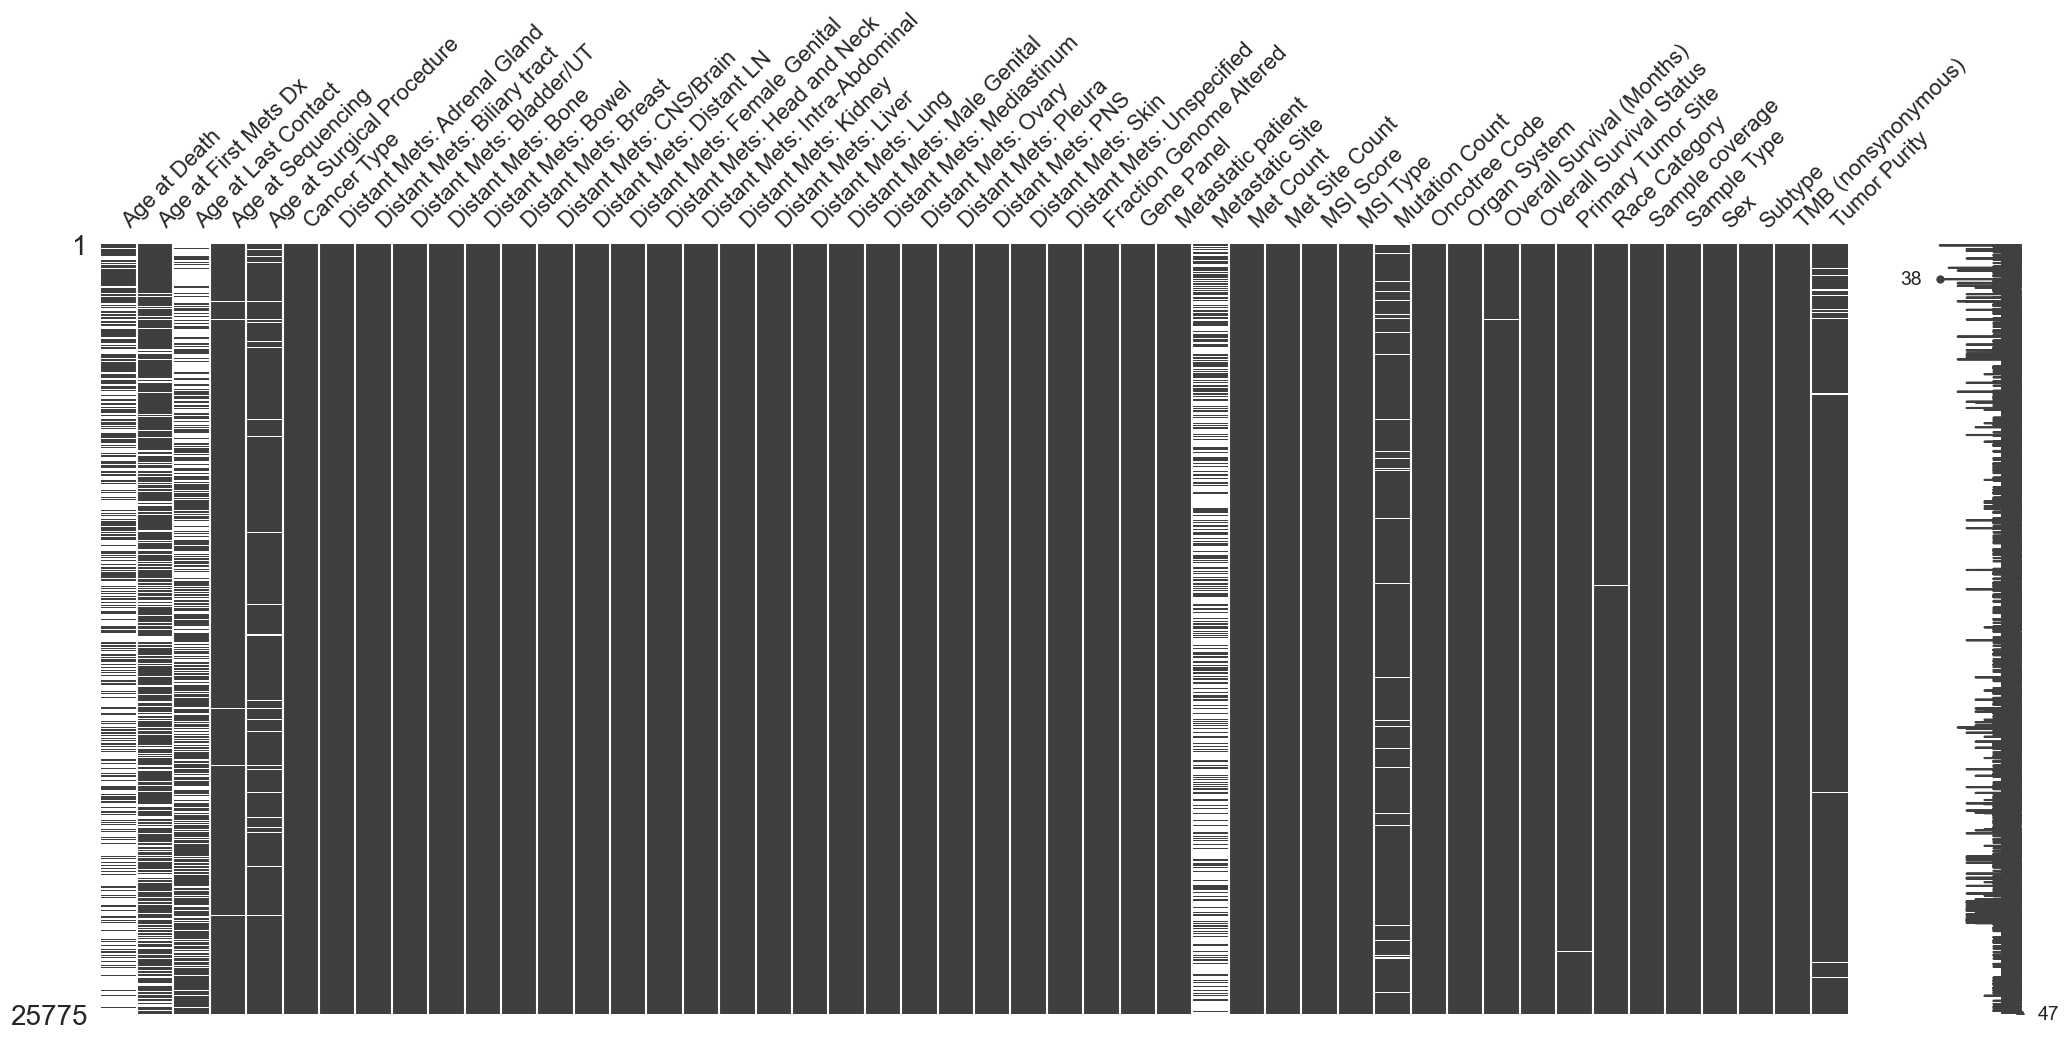

<Figure size 1500x900 with 0 Axes>

In [599]:
import missingno as msno

msno.matrix(og_df_removed)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

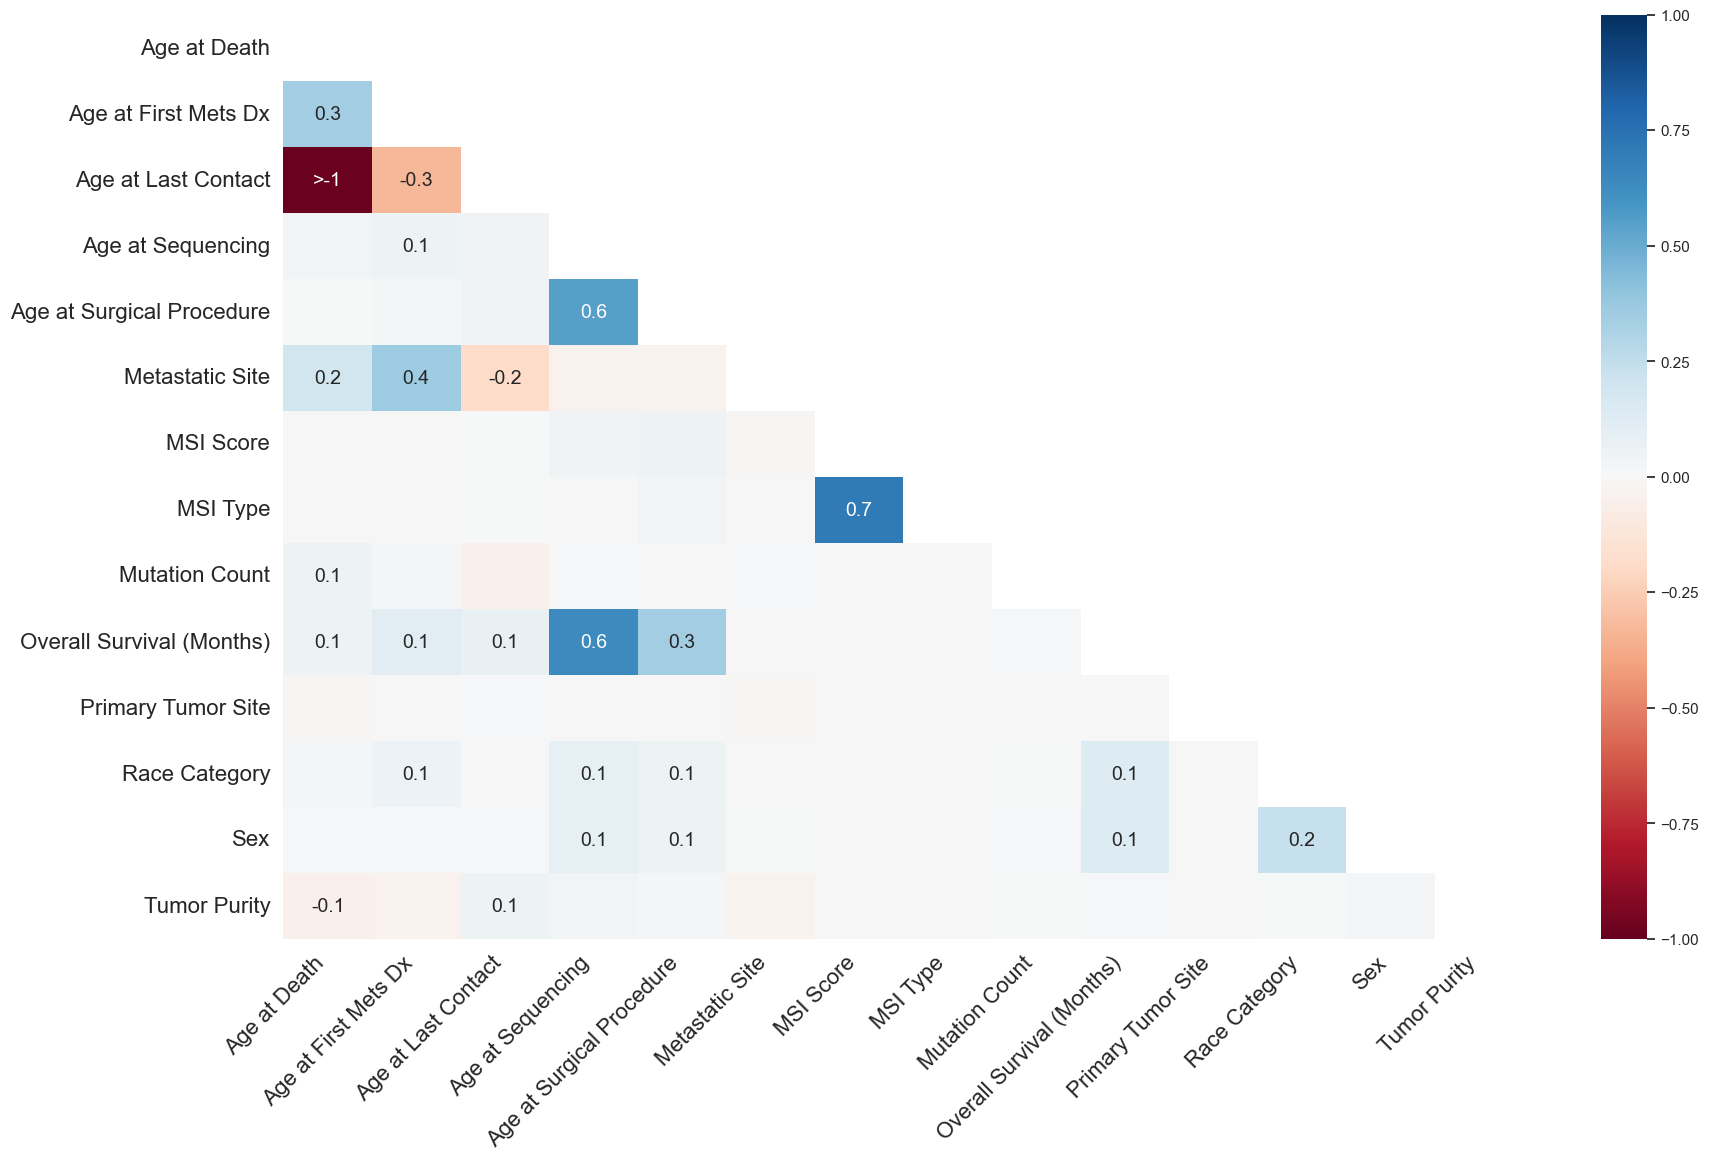

In [600]:
msno.heatmap(og_df_removed, labels = True)

<Axes: >

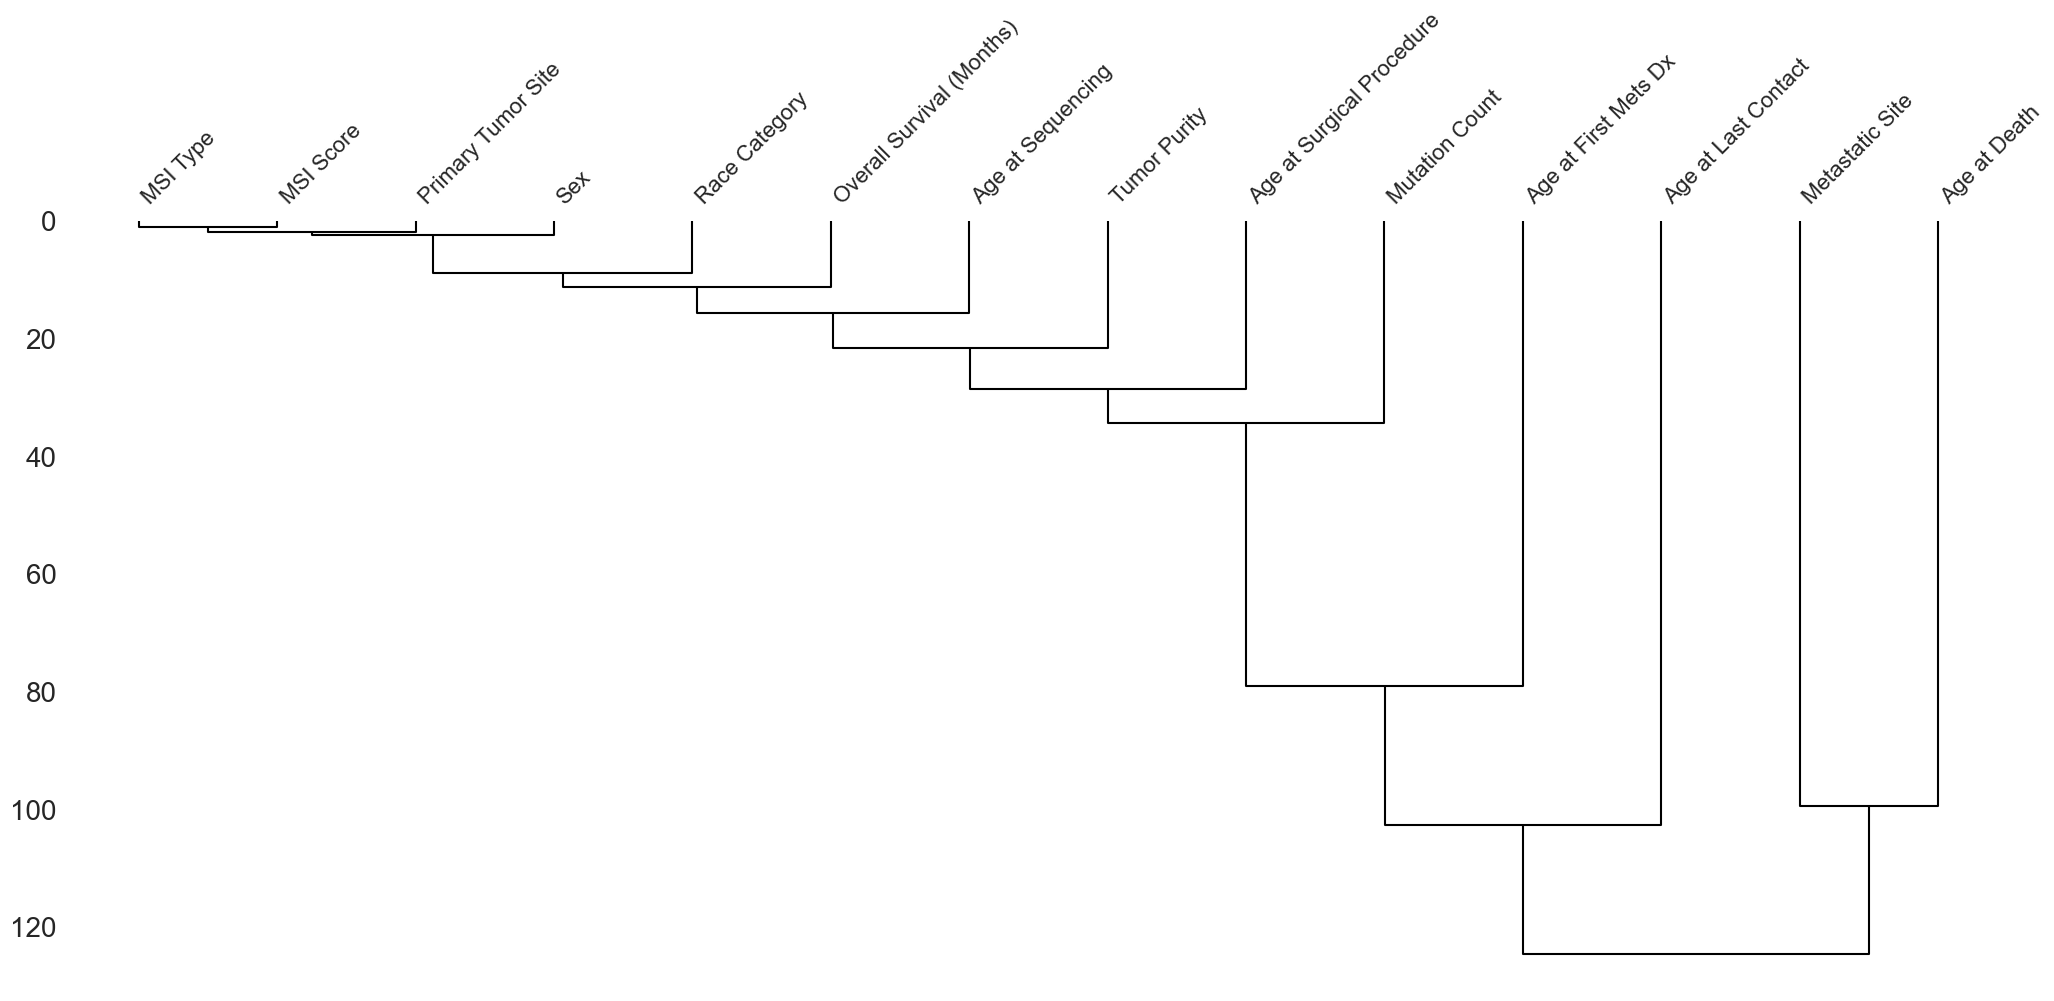

In [601]:
# Columns having missing values
missing_columns = [col for col in og_df_removed.columns if og_df_removed[col].isnull().sum() > 0]
missing_columns

msno.dendrogram(og_df_removed[missing_columns])

In [602]:
# Calculate the percentage of missing values for each column
missing_percentage = og_df_removed.isnull().mean() * 100

# Set a threshold for the percentage of missing values
threshold = 50 

columns_drop = missing_percentage[missing_percentage>threshold].index


In [603]:
columns_drop

Index(['Age at Death', 'Metastatic Site'], dtype='object')

In [604]:
df_selected_features = og_df_removed.drop(columns=columns_drop)


In [605]:
df_selected_features

,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,...,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,TMB (nonsynonymous),Tumor Purity
0,39.66,NaN,39.74,37.03,Breast Cancer,No,No,No,Yes,No,...,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,4.436621,50.0
1,44.25,NaN,44.44,44.42,Breast Cancer,No,No,No,Yes,No,...,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,7.764087,40.0
2,59.44,NaN,61.33,61.00,Endometrial Cancer,No,No,No,Yes,No,...,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,6.654932,40.0
3,69.65,NaN,74.81,74.64,Endometrial Cancer,Yes,Yes,No,No,Yes,...,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,1.957439,30.0
4,68.41,78.43,71.72,71.58,Endometrial Cancer,No,No,No,No,Yes,...,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,4.436621,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25770,NaN,58.12,57.23,56.38,Bladder Cancer,No,No,No,No,No,...,10.61,0:LIVING,Bladder,White,836,Primary,Male,Bladder Urothelial,12.105773,10.0
25771,70.00,71.03,70.14,70.00,Non-Small Cell Lung Cancer,No,No,No,No,No,...,10.58,0:LIVING,Lung,White,809,Metastasis,Female,Lung Squamous Cell Carcinoma,10.376377,20.0
25772,80.84,81.76,80.88,80.79,Endometrial Cancer,No,No,No,No,Yes,...,10.58,0:LIVING,Uterus,White,633,Primary,Female,Uterine Carcinosarcoma,9.511679,50.0
25773,NaN,44.11,43.23,43.21,Colorectal Cancer,No,No,No,No,No,...,10.61,0:LIVING,Colon,White,809,Primary,Male,Colorectal MSS,6.917585,30.0


In [606]:

# Fill the missing values with median value in all columns where data is not available..
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

df_selected_features['Age at Sequencing'] = imputer.fit_transform(og_df_removed[['Age at Sequencing']])
df_selected_features['Age at Surgical Procedure'] = imputer.fit_transform(og_df_removed[['Age at Surgical Procedure']])
df_selected_features['Age at First Mets Dx'] = imputer.fit_transform(og_df_removed[['Age at First Mets Dx']])
df_selected_features['Age at Last Contact'] = imputer.fit_transform(og_df_removed[['Age at Last Contact']])




In [607]:
df_selected_features['Sex'].fillna('Unknown', inplace=True)
df_selected_features['Race Category'].fillna('Unknown', inplace=True)

In [608]:

df_selected_features = df_selected_features[df_selected_features['MSI Type'].notna()]
df_selected_features = df_selected_features[df_selected_features['MSI Score'].notna()]
df_selected_features = df_selected_features[df_selected_features['Primary Tumor Site'].notna()]
df_selected_features = df_selected_features[df_selected_features['Overall Survival (Months)'].notna()]
df_selected_features = df_selected_features[df_selected_features['Tumor Purity'].notna()]
df_selected_features = df_selected_features[df_selected_features['Mutation Count'].notna()]

In [609]:
# The missing value and finding missing value of each columns 
total = df_selected_features.isnull().sum().sort_values(ascending  = False)
percent = round((df_selected_features.isnull().sum())/(df_selected_features.isnull().count()),2)*100
null_value = pd.concat([total, percent], axis = 1, keys = ['null_values', 'null_value_percentage'])
null_value.head(50)

,null_values,null_value_percentage
Age at First Mets Dx,0,0.0
Oncotree Code,0,0.0
Distant Mets: Unspecified,0,0.0
Fraction Genome Altered,0,0.0
Gene Panel,0,0.0
Metastatic patient,0,0.0
Met Count,0,0.0
Met Site Count,0,0.0
MSI Score,0,0.0
MSI Type,0,0.0


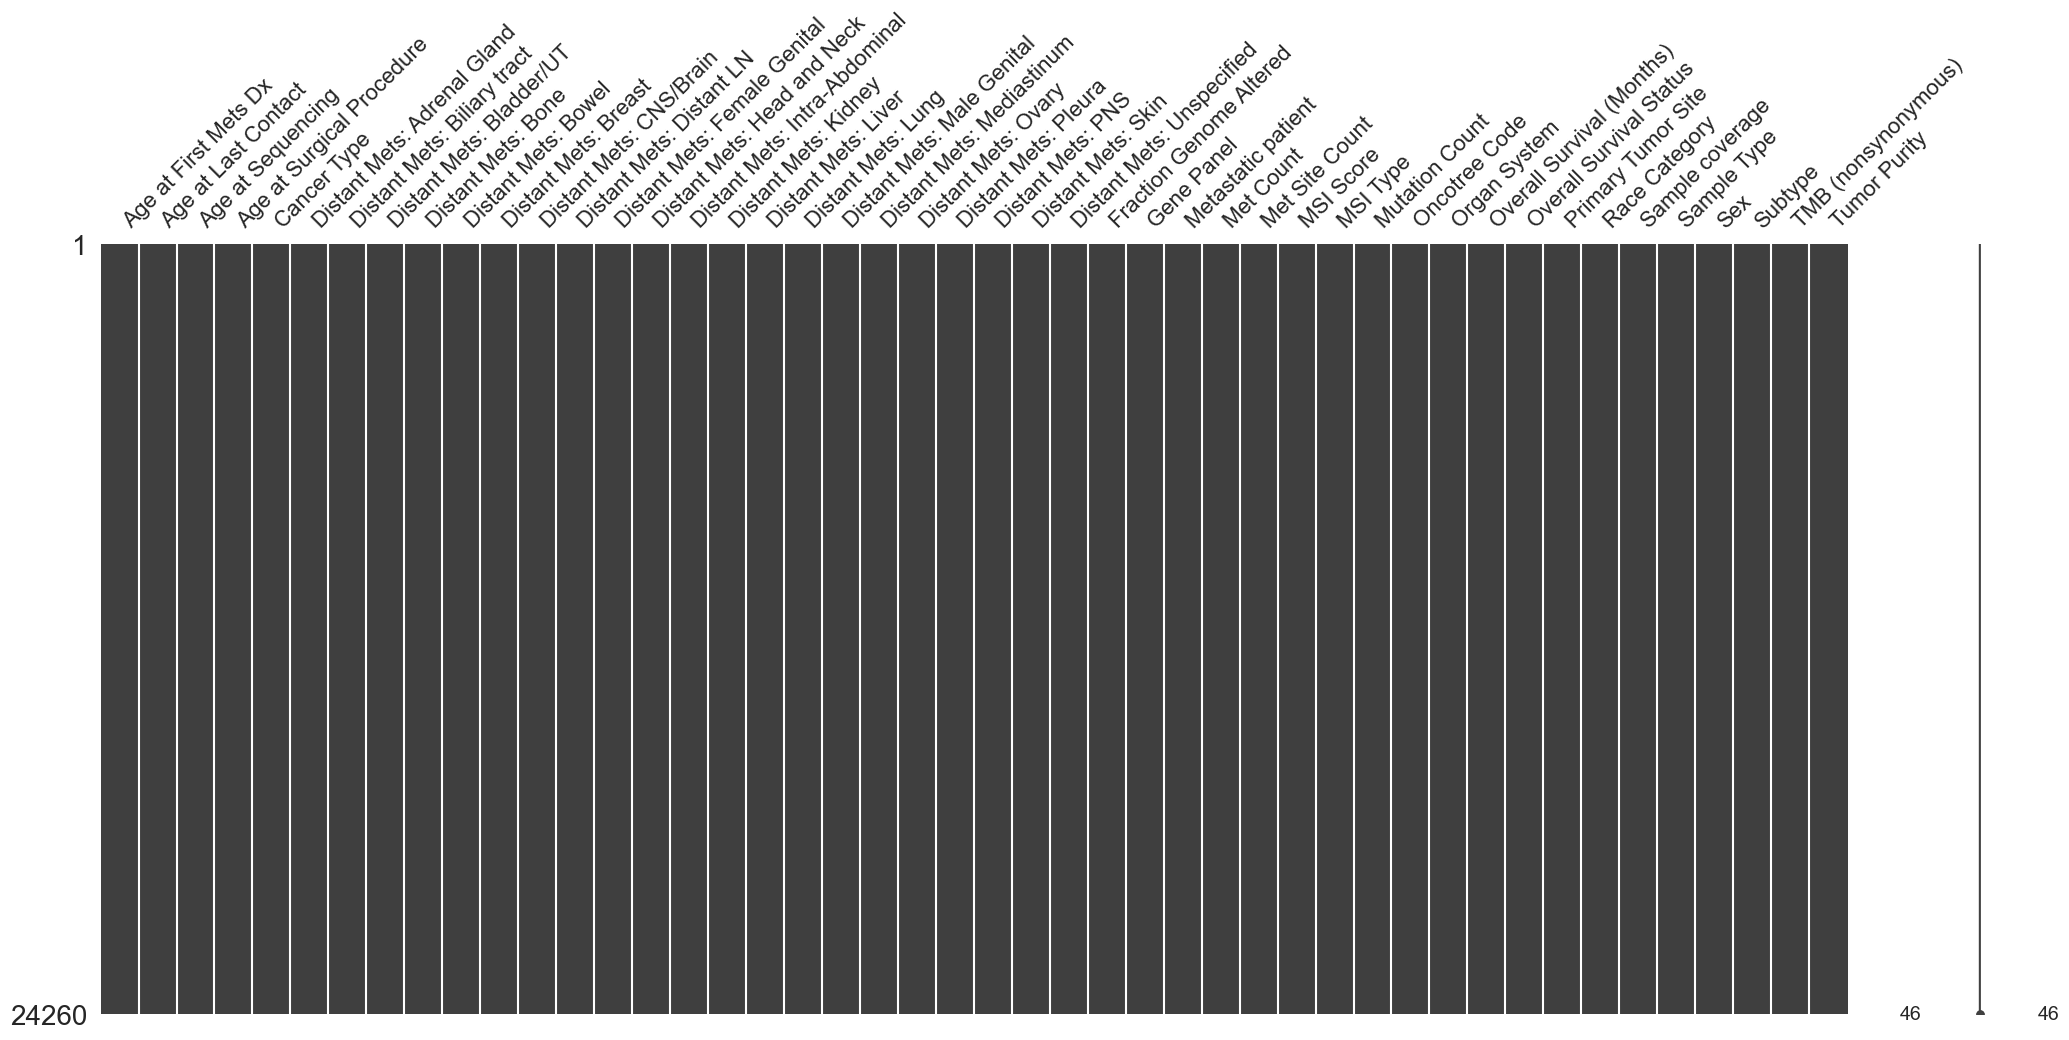

<Figure size 1500x900 with 0 Axes>

In [610]:
import missingno as msno

msno.matrix(df_selected_features)
plt.figure(figsize = (15,9))
plt.show()

In [611]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24260 entries, 0 to 25774
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at First Mets Dx           24260 non-null  float64
 1   Age at Last Contact            24260 non-null  float64
 2   Age at Sequencing              24260 non-null  float64
 3   Age at Surgical Procedure      24260 non-null  float64
 4   Cancer Type                    24260 non-null  object 
 5   Distant Mets: Adrenal Gland    24260 non-null  object 
 6   Distant Mets: Biliary tract    24260 non-null  object 
 7   Distant Mets: Bladder/UT       24260 non-null  object 
 8   Distant Mets: Bone             24260 non-null  object 
 9   Distant Mets: Bowel            24260 non-null  object 
 10  Distant Mets: Breast           24260 non-null  object 
 11  Distant Mets: CNS/Brain        24260 non-null  object 
 12  Distant Mets: Distant LN       24260 non-null  obje

# Handling Outliers in data


C:\Users\singh\AppData\Local\Temp\ipykernel_21572\2436856278.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)


Text(0.5, 1.0, 'The Distribution of Clinical Attributes')

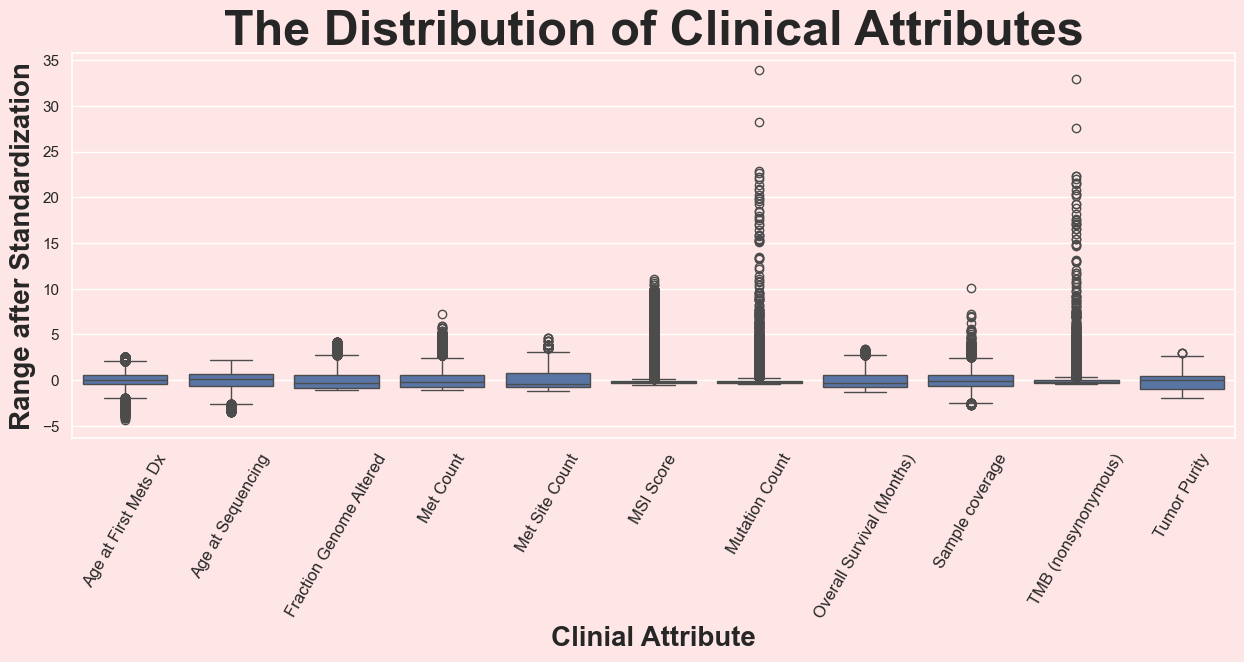

In [612]:
from sklearn.discriminant_analysis import StandardScaler


num_cols = ['Age at First Mets Dx',
            'Age at Sequencing', 'Fraction Genome Altered', 'Met Count', 
            'Met Site Count', 'MSI Score', 'Mutation Count', 'Overall Survival (Months)', 
            'Sample coverage', 'TMB (nonsynonymous)', 'Tumor Purity']

# Transforming the clinical attributes into the standard form after dropping the objective attributes
df_nums = df_selected_features[num_cols]
ss = StandardScaler()
attribute_nums = ss.fit_transform(df_nums)
attribute_df = pd.DataFrame(attribute_nums, index = df_nums.index, columns = df_nums.columns)
attribute_df = pd.melt(attribute_df)

# Visualizing these attributes
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.boxplot(x = 'variable', y = 'value', data = attribute_df)
plt.xlabel('Clinial Attribute', fontsize = 20, fontweight = 'bold')
plt.ylabel("Range after Standardization", fontsize = 20, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)

background_color = '#ffe6e6'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title('The Distribution of Clinical Attributes', fontsize = 35, fontweight = 'bold')


In [613]:
num_cols = ['Age at First Mets Dx',
            'Age at Sequencing', 'Fraction Genome Altered', 'Met Count', 
            'Met Site Count', 'MSI Score', 'Mutation Count', 'Overall Survival (Months)', 
            'Sample coverage', 'TMB (nonsynonymous)', 'Tumor Purity']
df_removed_outliers = df_selected_features
for col in num_cols:
  q1 = df_selected_features[col].quantile(0.25)
  q3 = df_selected_features[col].quantile(0.65)
  IQR = q3-q1
  lower_lim = q1 - 1.5*IQR
  upper_lim = q3 + 1.5*IQR
  outlierLower = (df_selected_features[col] < lower_lim)
  outlierUpper = (df_selected_features[col] > upper_lim)
  df_removed_outliers = df_removed_outliers[~(outlierUpper | outlierLower)]

C:\Users\singh\AppData\Local\Temp\ipykernel_21572\619101815.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed_outliers = df_removed_outliers[~(outlierUpper | outlierLower)]
C:\Users\singh\AppData\Local\Temp\ipykernel_21572\619101815.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed_outliers = df_removed_outliers[~(outlierUpper | outlierLower)]
C:\Users\singh\AppData\Local\Temp\ipykernel_21572\619101815.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed_outliers = df_removed_outliers[~(outlierUpper | outlierLower)]
C:\Users\singh\AppData\Local\Temp\ipykernel_21572\619101815.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed_outliers = df_removed_outliers[~(outlierUpper | outlierLower)]
C:\Users\singh\AppData\Local\Temp\ipykernel_21572\619101815.py:14: UserWarning: Boolean Series key will be reindexed to matc

In [614]:
df_removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10710 entries, 2 to 25773
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at First Mets Dx           10710 non-null  float64
 1   Age at Last Contact            10710 non-null  float64
 2   Age at Sequencing              10710 non-null  float64
 3   Age at Surgical Procedure      10710 non-null  float64
 4   Cancer Type                    10710 non-null  object 
 5   Distant Mets: Adrenal Gland    10710 non-null  object 
 6   Distant Mets: Biliary tract    10710 non-null  object 
 7   Distant Mets: Bladder/UT       10710 non-null  object 
 8   Distant Mets: Bone             10710 non-null  object 
 9   Distant Mets: Bowel            10710 non-null  object 
 10  Distant Mets: Breast           10710 non-null  object 
 11  Distant Mets: CNS/Brain        10710 non-null  object 
 12  Distant Mets: Distant LN       10710 non-null  obje

C:\Users\singh\AppData\Local\Temp\ipykernel_21572\834633082.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)


Text(0.5, 1.0, 'The Distribution of Clinical Attributes')

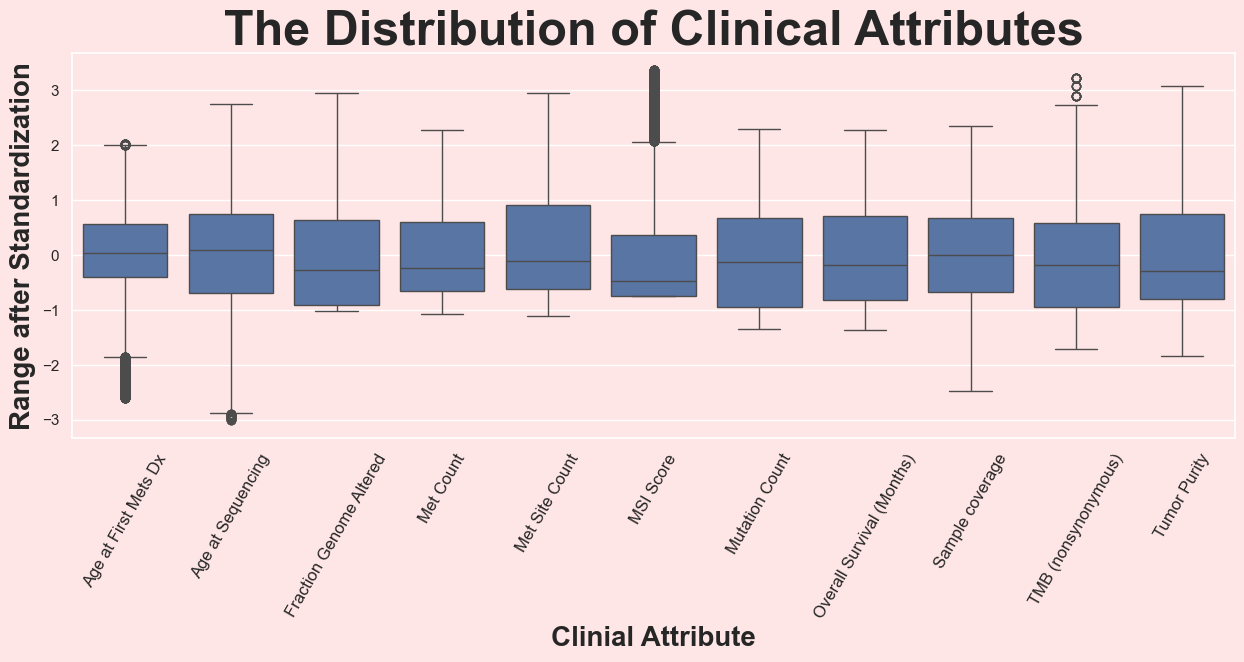

In [615]:
from sklearn.discriminant_analysis import StandardScaler


num_cols = ['Age at First Mets Dx',
            'Age at Sequencing','Fraction Genome Altered', 'Met Count', 
            'Met Site Count', 'MSI Score', 'Mutation Count', 'Overall Survival (Months)', 
            'Sample coverage', 'TMB (nonsynonymous)', 'Tumor Purity']

# Transforming the clinical attributes into the standard form after dropping the objective attributes
df_nums = df_removed_outliers[num_cols]
ss = StandardScaler()
attribute_nums = ss.fit_transform(df_nums)
attribute_df = pd.DataFrame(attribute_nums, index = df_nums.index, columns = df_nums.columns)
attribute_df = pd.melt(attribute_df)

# Visualizing these attributes
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.boxplot(x = 'variable', y = 'value', data = attribute_df)
plt.xlabel('Clinial Attribute', fontsize = 20, fontweight = 'bold')
plt.ylabel("Range after Standardization", fontsize = 20, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)

background_color = '#ffe6e6'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title('The Distribution of Clinical Attributes', fontsize = 35, fontweight = 'bold')

# Exploratory Analysis of Data

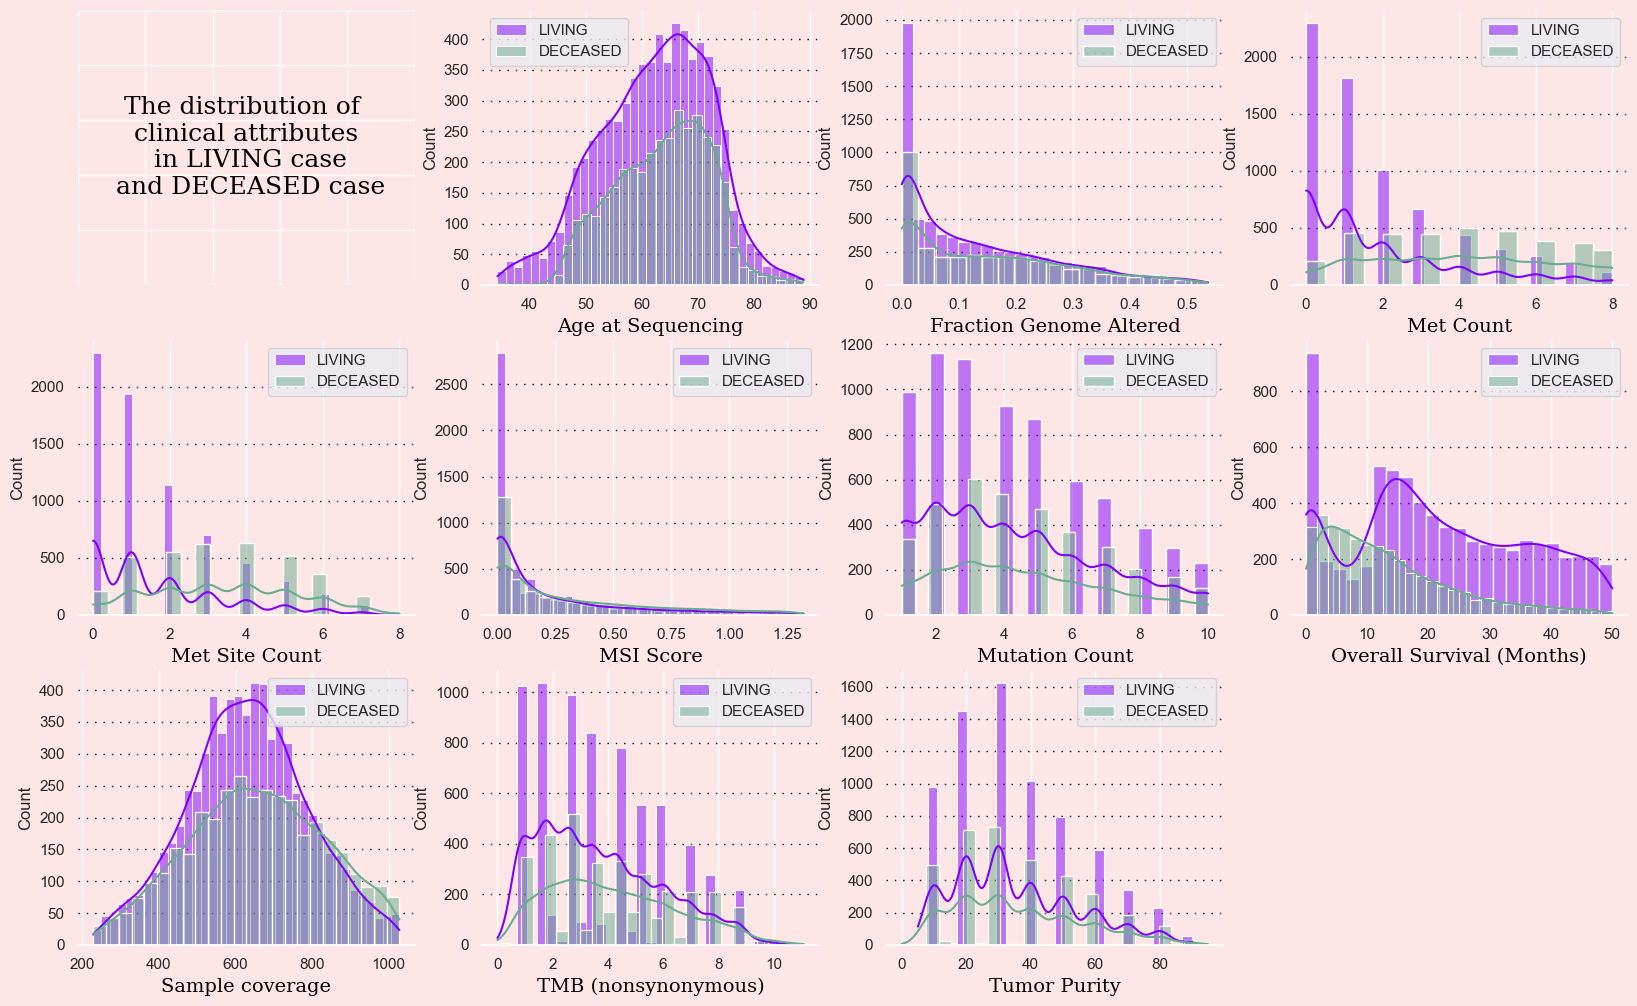

In [616]:
# The distribution of numerical clinical attributes first 
fig = plt.figure(figsize = (20, 25))
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)

num_cols = ['Age at First Mets Dx',
            'Age at Sequencing','Fraction Genome Altered', 'Met Count', 
            'Met Site Count', 'MSI Score', 'Mutation Count', 'Overall Survival (Months)', 
            'Sample coverage', 'TMB (nonsynonymous)', 'Tumor Purity']

for index, column in enumerate(num_cols):
    ax = plt.subplot(6, 4, index + 1)
    if index == 0:
        ax.text(0.5, 0.5, "The distribution of \nclinical attributes\n in LIVING case\n and DECEASED case",
               horizontalalignment = 'center',
               verticalalignment= 'center', 
               fontsize = 18, fontfamily = 'serif', color = '#000000')
        ax.set_facecolor(background_color)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left = False, right = False )
        continue
    sns.histplot(x = df_removed_outliers[df_removed_outliers['Overall Survival Status'] == '0:LIVING'][column], kde = True, color=color_palette[1], label = 'LIVING')
    sns.histplot(x= df_removed_outliers[df_removed_outliers['Overall Survival Status'] == '1:DECEASED'][column], kde = True, color=color_palette[2], label='DECEASED')

    
    ax.legend()
    
    ax.set_xlabel(column, fontsize = 14, fontfamily = 'serif', color = '#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    for s in ['top','right', 'left']:
        ax.spines[s].set_visible(False)

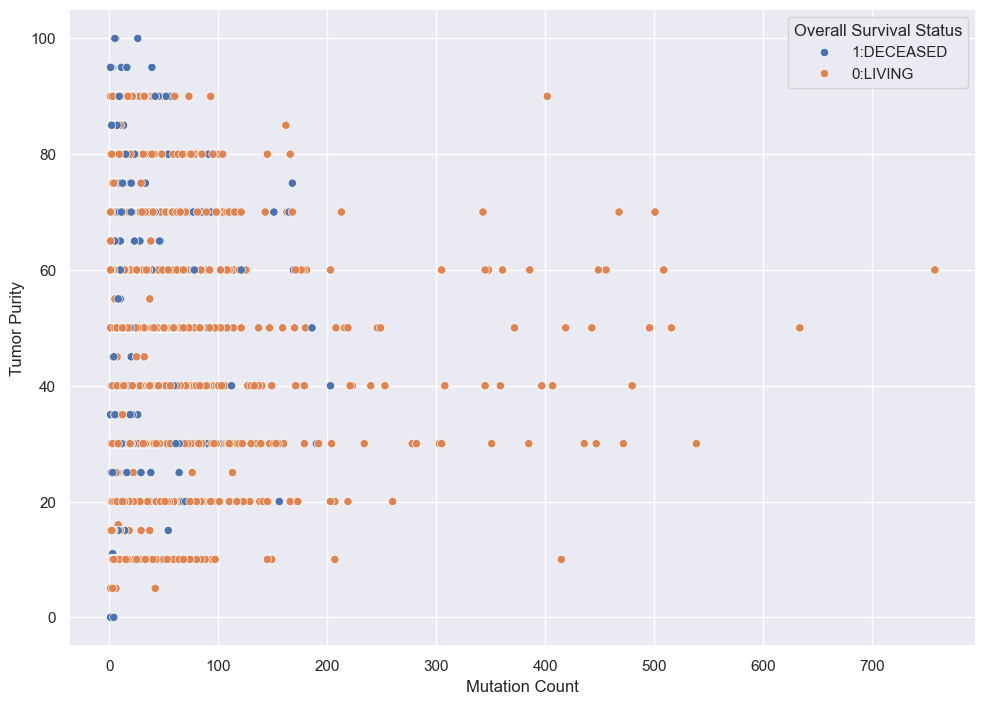

In [617]:
sns.scatterplot(x='Mutation Count', y='Tumor Purity', data=og_df_removed, hue='Overall Survival Status');

## Conclusion
- As per above graph we can say that higher the mutation count more are the chances of living and the tumor purity is also below 70.

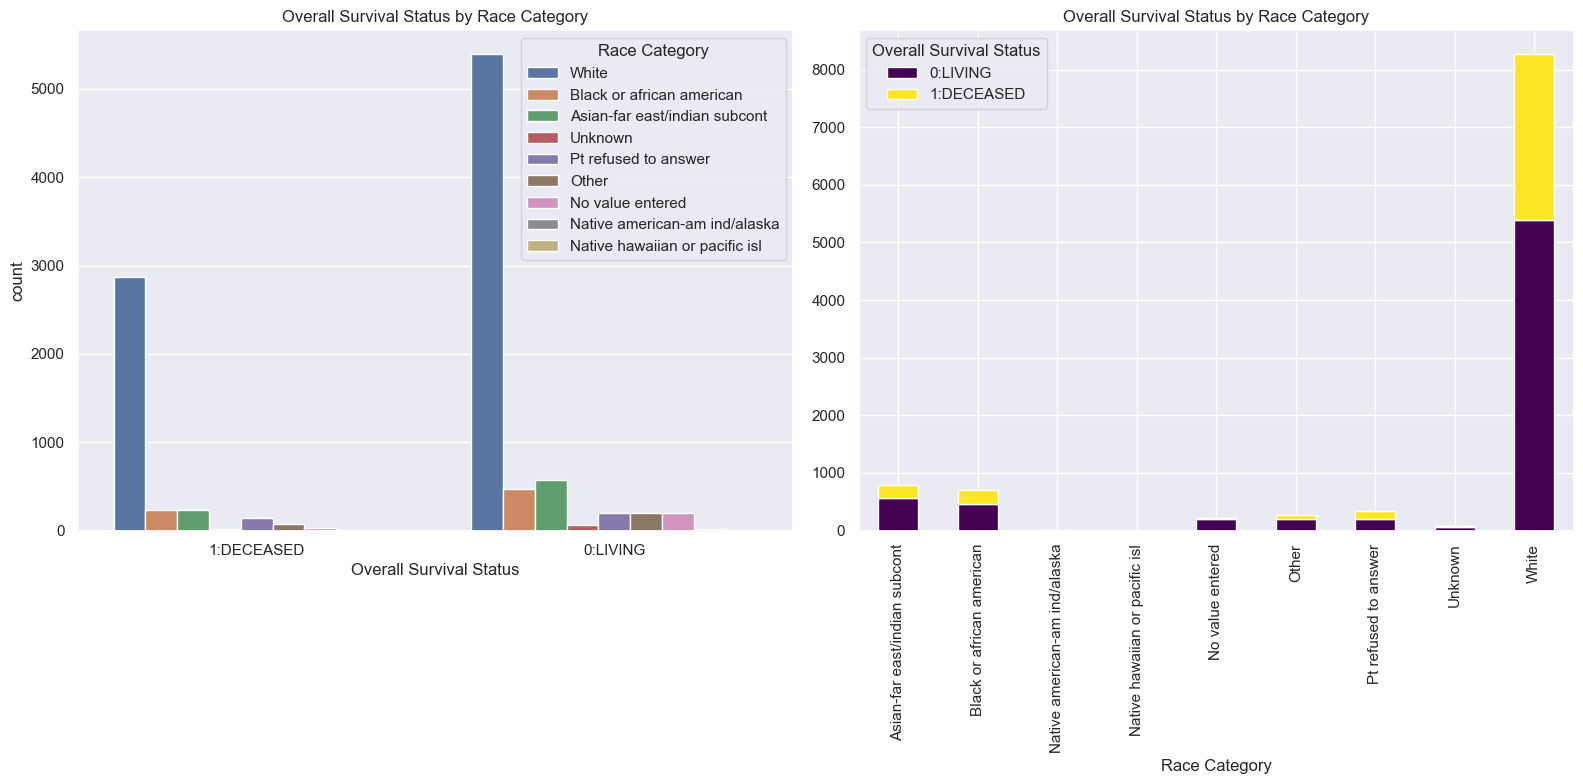

In [664]:
# Set up subplots with larger figsize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot count plot for Overall Survival Status based on Race Category
sns.countplot(x='Overall Survival Status', hue='Race Category', data=df_removed_outliers, ax=axes[0])
axes[0].set_title('Overall Survival Status by Race Category')

# Plot stacked bar chart for Overall Survival Status based on Race Category
survival_by_race = pd.crosstab(df_removed_outliers['Race Category'], df_removed_outliers['Overall Survival Status'])
survival_by_race.plot(kind='bar', stacked=True, ax=axes[1], cmap='viridis')
axes[1].set_title('Overall Survival Status by Race Category')

# Customize the layout if needed
plt.tight_layout()
plt.show()

## Conclusion
- From above plot we can see that the data looks biased as most of the data belong to white people.

C:\Users\singh\AppData\Local\Temp\ipykernel_21572\4249227236.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Breast Cancer'),
 Text(1, 0, 'Endometrial Cancer'),
 Text(2, 0, 'Mesothelioma'),
 Text(3, 0, 'Bladder Cancer'),
 Text(4, 0, 'Hepatobiliary Cancer'),
 Text(5, 0, 'Esophagogastric Cancer'),
 Text(6, 0, 'Ovarian Cancer'),
 Text(7, 0, 'Non-Small Cell Lung Cancer'),
 Text(8, 0, 'Uterine Sarcoma'),
 Text(9, 0, 'Germ Cell Tumor'),
 Text(10, 0, 'Small Cell Lung Cancer'),
 Text(11, 0, 'Colorectal Cancer'),
 Text(12, 0, 'Gastrointestinal Stromal Tumor'),
 Text(13, 0, 'Pancreatic Cancer'),
 Text(14, 0, 'Soft Tissue Sarcoma'),
 Text(15, 0, 'Thyroid Cancer'),
 Text(16, 0, 'Prostate Cancer'),
 Text(17, 0, 'Salivary Gland Cancer'),
 Text(18, 0, 'Cervical Cancer'),
 Text(19, 0, 'Anal Cancer'),
 Text(20, 0, 'Skin Cancer, Non-Melanoma'),
 Text(21, 0, 'Renal Cell Carcinoma'),
 Text(22, 0, 'Head and Neck Cancer'),
 Text(23, 0, 'Melanoma'),
 Text(24, 0, 'Appendiceal Cancer'),
 Text(25, 0, 'Small Bowel Cancer'),
 Text(26, 0, 'Gastrointestinal Neuroendocrine Tumor')]

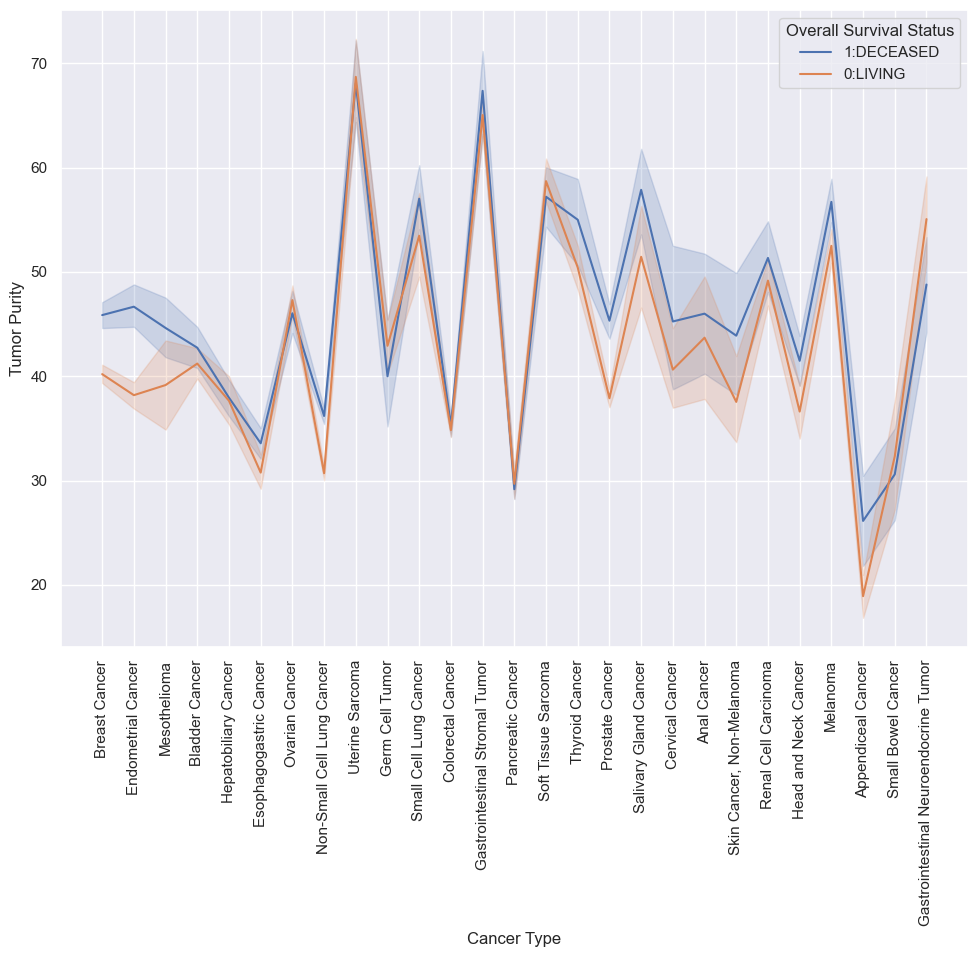

In [618]:
plot = sns.lineplot(x='Cancer Type', y='Tumor Purity', data=og_df_removed, hue='Overall Survival Status');
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Conclusion
- By looking at the plot we can say that Appendiceal Cancer has the lowest Tumor purity and Uterine Sarcoma has highest Tumor Purity.

# Data Encoding

In [619]:
# Specify columns for one-hot encoding
columns_to_encode = ['Cancer Type', 'Gene Panel', 'MSI Type', 'Oncotree Code', 
                     'Organ System', 'Primary Tumor Site', 'Race Category', 
                     'Sample Type', 'Sex', 'Subtype']


In [620]:
# Use the pandas get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(df_selected_features, columns=columns_to_encode)

In [621]:
df_encoded.replace({True: 1, False: 0, 'Yes': 1, 'No': 0, 'NaN':0}, inplace=True)

In [622]:
df_clean = df_encoded.dropna()

In [623]:
df_clean.shape

(24260, 416)

In [624]:
df_clean['Overall Survival Status'] = df_clean['Overall Survival Status'].map({'1:DECEASED': 1, '0:LIVING': 0})


In [625]:
df_clean.shape

(24260, 416)

# Model Training

In [626]:
# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

In [627]:
correlation_matrix

,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,...,Subtype_Stomach Adenocarinoma,Subtype_Testicular Non-Seminoma,Subtype_Testicular Seminoma,Subtype_Thyroid Papillary,Subtype_Thyroid Poorly Differentiated,Subtype_Upper Tract Urothelial,Subtype_Uterine Carcinosarcoma,Subtype_Uterine Endometrioid,Subtype_Uterine Hypermutated,Subtype_Uterine Serous
Age at First Mets Dx,1.000000,0.542245,0.833412,0.824203,-0.024699,-0.038882,-0.013482,-0.042585,-0.044182,-0.051219,...,-0.028902,-0.169839,-0.056202,-0.014027,-0.008212,0.036742,0.035277,0.003984,0.009306,0.058319
Age at Last Contact,0.542245,1.000000,0.777322,0.758215,0.011617,0.011548,0.025780,0.037237,0.001998,-0.005116,...,-0.009572,-0.153759,-0.087210,-0.035135,-0.005809,0.028242,0.023301,-0.015982,-0.008389,0.040769
Age at Sequencing,0.833412,0.777322,1.000000,0.976755,-0.010744,-0.017521,0.010525,-0.001926,-0.016889,-0.033128,...,-0.029980,-0.167048,-0.082001,-0.024996,0.003019,0.037776,0.031896,-0.013407,-0.003161,0.060418
Age at Surgical Procedure,0.824203,0.758215,0.976755,1.000000,-0.010007,-0.018904,0.005275,-0.005647,-0.019570,-0.035180,...,-0.027596,-0.177205,-0.090129,-0.037506,-0.002261,0.038085,0.030311,-0.011513,-0.003169,0.058801
Distant Mets: Adrenal Gland,-0.024699,0.011617,-0.010744,-0.010007,1.000000,0.159272,0.020379,0.200035,0.036151,0.031370,...,0.008635,-0.006643,-0.000358,-0.010039,0.008955,-0.005870,-0.009861,-0.028201,-0.022789,-0.008979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subtype_Upper Tract Urothelial,0.036742,0.028242,0.037776,0.038085,-0.005870,-0.013227,0.085517,-0.009764,-0.023564,-0.005516,...,-0.009687,-0.006853,-0.004855,-0.009549,-0.006436,1.000000,-0.007872,-0.013572,-0.009323,-0.009635
Subtype_Uterine Carcinosarcoma,0.035277,0.023301,0.031896,0.030311,-0.009861,0.003188,0.037201,-0.029290,0.042236,-0.005628,...,-0.009764,-0.006908,-0.004894,-0.009626,-0.006488,-0.007872,1.000000,-0.013681,-0.009397,-0.009712
Subtype_Uterine Endometrioid,0.003984,-0.015982,-0.013407,-0.011513,-0.028201,-0.038006,0.011126,-0.062860,-0.001831,-0.012026,...,-0.016833,-0.011909,-0.008437,-0.016595,-0.011185,-0.013572,-0.013681,1.000000,-0.016201,-0.016744
Subtype_Uterine Hypermutated,0.009306,-0.008389,-0.003161,-0.003169,-0.022789,-0.029522,0.013983,-0.046101,0.005324,-0.008099,...,-0.011563,-0.008180,-0.005795,-0.011399,-0.007683,-0.009323,-0.009397,-0.016201,1.000000,-0.011502


In [628]:
X = df_clean.drop('Overall Survival Status', axis=1)
y = df_clean['Overall Survival Status']

In [629]:
X.head()

,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,...,Subtype_Stomach Adenocarinoma,Subtype_Testicular Non-Seminoma,Subtype_Testicular Seminoma,Subtype_Thyroid Papillary,Subtype_Thyroid Poorly Differentiated,Subtype_Upper Tract Urothelial,Subtype_Uterine Carcinosarcoma,Subtype_Uterine Endometrioid,Subtype_Uterine Hypermutated,Subtype_Uterine Serous
0,39.66,65.075,39.74,37.03,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44.25,65.075,44.44,44.42,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.44,65.075,61.33,61.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,69.65,65.075,74.81,74.64,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,68.41,78.430,71.72,71.58,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Dimensionality Reduction
- PCA

In [630]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
num_components = 10  # Choose the number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistics Regression for Prediction after Dimensionality Reduction Using PCA

In [631]:
from sklearn.metrics import accuracy_score

# Train Logistic Regression model on the reduced dataset
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy * 100:.2f}%")

Accuracy after PCA: 76.03%


C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine for Prediction after Dimensionality Reduction Using PCA

In [632]:
# Initialize SVM model on the reduced dataset
svm_model_pca = SVC(random_state=42)

# Train the SVM model
svm_model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
print(f"SVM Accuracy after PCA: {accuracy_svm_pca * 100:.2f}%")

SVM Accuracy after PCA: 78.92%


# Random Forest Classifier for Prediction after Dimensionality Reduction Using PCA

In [633]:
# Initialize Random Forest model on the reduced dataset
rf_model_pca = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Random Forest Accuracy after PCA: {accuracy_rf_pca * 100:.2f}%")

Random Forest Accuracy after PCA: 95.57%


# Best Feature Selection using SelectKBest from skLearn

In [634]:
from sklearn.feature_selection import SelectKBest, f_classif


In [635]:
num_features = 10
selector = SelectKBest(score_func=f_classif, k=num_features)
fit = selector.fit(X, y)
selected_features = X.columns[fit.get_support()]

In [636]:
selected_features

Index(['Distant Mets: Bone', 'Distant Mets: CNS/Brain',
       'Distant Mets: Intra-Abdominal', 'Distant Mets: Liver',
       'Distant Mets: Lung', 'Metastatic patient', 'Met Count',
       'Met Site Count', 'Overall Survival (Months)', 'Gene Panel_IMPACT468'],
      dtype='object')

# Logistics Regression for Prediction on K best features using SelectKBest

In [637]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 78.75%


C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM for Prediction on K best features using SelectKBest

In [638]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")



SVM Accuracy: 79.70%


# Random Forest Classifier for Prediction on K best features using SelectKBest

In [639]:
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 77.16%


# Best Feature Selection using mutual information from skLearn

In [640]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi_scores = mutual_info_classif(X, y)

# Select the top features
selected_features_mi = X.columns[mi_scores.argsort()[-15:][::-1]]


In [641]:
selected_features_mi

Index(['Age at Last Contact', 'Overall Survival (Months)', 'Met Count',
       'Met Site Count', 'Age at First Mets Dx', 'Distant Mets: Liver',
       'Metastatic patient', 'TMB (nonsynonymous)', 'Distant Mets: Bone',
       'Distant Mets: Lung', 'Distant Mets: CNS/Brain',
       'Distant Mets: Intra-Abdominal', 'Gene Panel_IMPACT468',
       'Sample Type_Primary', 'Distant Mets: Distant LN'],
      dtype='object')

# Logistics Regression for Prediction on K best features using mutual information

In [642]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_mi], y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 79.20%


C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM for Prediction on K best features using mutual information

In [643]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_mi], y, test_size=0.2, random_state=42) ## Apply RandomForestClassifier

from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")



SVM Accuracy: 87.96%


# RandomForestClassifier for Prediction on K best features using mutual information

In [660]:
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_mi], y, test_size=0.2, random_state=42)


# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 99.32%


## Saving trained random forest model

In [665]:
import joblib

model_filename = "trained_model_99.joblib"
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as trained_model_99.joblib


## Loading the saved model

In [667]:
# Load the saved model
loaded_model = joblib.load("trained_model_99.joblib")

# Now, you can use the loaded_model for predictions
predictions = loaded_model.predict(X_test)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## ROC AUC curve for the best model

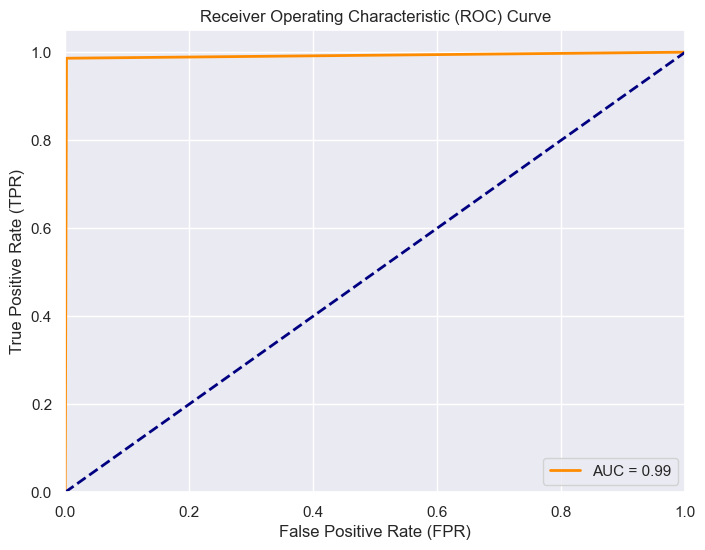

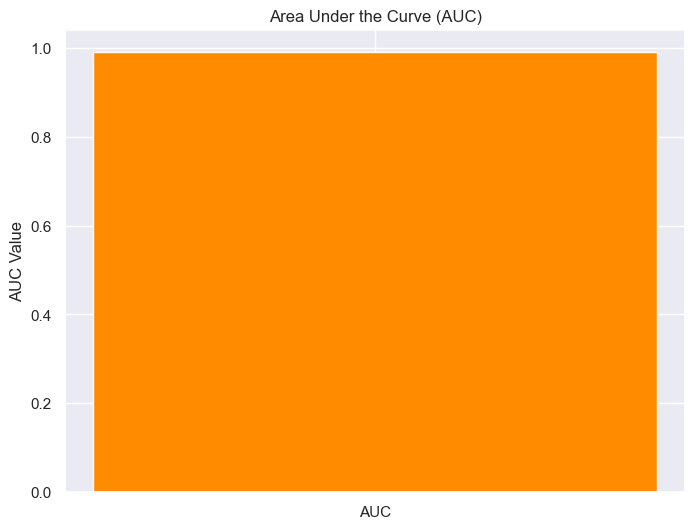

In [661]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot AUC value
plt.figure(figsize=(8, 6))
plt.bar([0], [roc_auc], color='darkorange', width=0.2)
plt.xticks([0], ['AUC'])
plt.ylabel('AUC Value')
plt.title('Area Under the Curve (AUC)')
plt.show()